<a href="https://colab.research.google.com/github/RubyNixx/machine_learning/blob/main/Support_Vector_Machine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Support Vector Machine Classification


## What will we do?

We will build a Support Vector Machine that will find the optimal hyperplane that maximizes the margin between two toy data classes using gradient descent.  

![alt text](http://opticalengineering.spiedigitallibrary.org/data/journals/optice/24850/oe_52_2_027003_f005.png "Logo Title Text 1")


## What are some use cases for SVMs?

-Classification, regression (time series prediction, etc) , outlier detection, clustering


## How does an SVM compare to other ML algorithms?

![alt text](https://image.slidesharecdn.com/mscpresentation-140722065852-phpapp01/95/msc-presentation-bioinformatics-7-638.jpg?cb=1406012610 "Logo Title Text 1")

- As a rule of thumb, SVMs are great for relatively small data sets with fewer outliers.
- Other algorithms (Random forests, deep neural networks, etc.) require more data but almost always come up with very robust models.
- The decision of which classifier to use depends on your dataset and the general complexity of the problem.
- "Premature optimization is the root of all evil (or at least most of it) in programming." - Donald Knuth, CS Professor (Turing award speech 1974)  


## What is a Support Vector Machine?

It's a supervised machine learning algorithm which can be used for both classification or regression problems. But it's usually used for classification. Given 2 or more labeled classes of data, it acts as a discriminative classifier, formally defined by an optimal hyperplane that seperates all the classes. New examples that are then mapped into that same space can then be categorized based on on which side of the gap they fall.

## What are Support Vectors?

![alt text](https://www.dtreg.com/uploaded/pageimg/SvmMargin2.jpg "Logo Title Text 1")

Support vectors are the data points nearest to the hyperplane, the points of a data set that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a data set, they are what help us build our SVM.

## Whats a hyperplane?

![alt text](http://slideplayer.com/slide/1579281/5/images/32/Hyperplanes+as+decision+surfaces.jpg "Logo Title Text 1")

Geometry tells us that a hyperplane is a subspace of one dimension less than its ambient space. For instance, a hyperplane of an n-dimensional space is a flat subset with dimension n − 1. By its nature, it separates the space into two half spaces.

## Let's define our loss function (what to minimize) and our objective function (what to optimize)

#### Loss function

We'll use the Hinge loss. This is a loss function used for training classifiers. The hinge loss is used for "maximum-margin" classification, most notably for support vector machines (SVMs).

![alt text](http://i.imgur.com/OzCwzyN.png "Logo Title Text 1")


c is the loss function, x the sample, y is the true label, f(x) the predicted label.

![alt text](http://i.imgur.com/FZ7JcG3.png "Logo Title Text 1")


#### Objective Function

![alt text](http://i.imgur.com/I5NNu44.png "Logo Title Text 1")

As you can see, our objective of a SVM consists of two terms. The first term is a regularizer, the heart of the SVM, the second term the loss. The regularizer balances between margin maximization and loss. We want to find the decision surface that is maximally far away from any data points.

How do we minimize our loss/optimize for our objective (i.e learn)?

We have to derive our objective function to get the gradients! Gradient descent ftw.  As we have two terms, we will derive them seperately using the sum rule in differentiation.


![alt text](http://i.imgur.com/6uK3BnH.png "Logo Title Text 1")

This means, if we have a misclassified sample, we update the weight vector w using the gradients of both terms, else if classified correctly,we just update w by the gradient of the regularizer.



Misclassification condition

![alt text](http://i.imgur.com/g9QLAyn.png "Logo Title Text 1")

Update rule for our weights (misclassified)

![alt text](http://i.imgur.com/rkdPpTZ.png "Logo Title Text 1")

including the learning rate η and the regularizer λ
The learning rate is the length of the steps the algorithm makes down the gradient on the error curve.
- Learning rate too high? The algorithm might overshoot the optimal point.
- Learning rate too low? Could take too long to converge. Or never converge.

The regularizer controls the trade off between the achieving a low training error and a low testing error that is the ability to generalize your classifier to unseen data. As a regulizing parameter we choose 1/epochs, so this parameter will decrease, as the number of epochs increases.
- Regularizer too high? overfit (large testing error)
- Regularizer too low? underfit (large training error)

Update rule for our weights (correctly classified)

![alt text](http://i.imgur.com/xTKbvZ6.png "Logo Title Text 1")


# Data importing and preprocessing

This snippet preprocesses the Breast Cancer Wisconsin dataset to prepare it for classification tasks. It demonstrates key data manipulation techniques like mapping categorical values, creating new columns, and dropping irrelevant columns. These steps are crucial for building a machine-learning model, particularly Support Vector Machines (SVM), which require clean and structured data.

**Explanation of the Code:**

**Data Loading:**
The dataset is loaded from a GitHub URL using pd.read_csv. It contains data on breast cancer cases, including attributes of cell nuclei and whether the diagnosis was malignant (M) or benign (B).

**Label Mapping**:
The diagnosis column is mapped to numerical values to make it suitable for machine-learning models:

* Malignant (M) → 1
* Benign (B) → 2

**Preserving Labels:**
A new column, `Class`, is created to store the numerical labels derived from the diagnosis column. This ensures that the processed labels are preserved in case further manipulations are required.

**Dropping Unnecessary Columns:**

`id`: Since it's only a unique identifier, it doesn't contribute to the classification task.
`Unnamed: 32`: A completely empty column with no data.
`diagnosis`: This column is redundant after the creation of the Class column.
**Verification:**
The `df.head()` function displays the first five rows of the dataset, allowing you to verify the success of the preprocessing steps.

**Why Is This Important for SVM?**

Support Vector Machines perform best with clean and well-structured numerical data. By:

-Converting categorical labels to numerical values,

-Removing unnecessary features, and

-Structuring the dataset clearly,

we ensure that the SVM model will focus on the most relevant features to distinguish between malignant and benign tumors.


In [ ]:
# Reading the dataset directly from a GitHub repository URL
# The dataset contains Breast Cancer Wisconsin Data, which will be used for classification tasks
url = 'https://raw.githubusercontent.com/melwinlobo18/K-Nearest-Neighbors/master/Dataset/data.csv'
df = pd.read_csv(url)

# Mapping the 'diagnosis' column values to numerical values:
# 'M' (Malignant) is mapped to 1, indicating a harmful tumor,
# 'B' (Benign) is mapped to 2, indicating a non-harmful tumor.
df['diagnosis'] = df['diagnosis'].map({
    'M': 1,
    'B': 2
})

# Extracting the diagnosis labels as a list for later use in model training
labels = df['diagnosis'].tolist()

# Creating a new column 'Class' and copying the mapped diagnosis values into it.
# This ensures that the labels are preserved in the 'Class' column while 'diagnosis' can be removed.
df['Class'] = labels

# Dropping unnecessary columns:
# - 'id': A unique identifier for each sample, which is not needed for classification.
# - 'Unnamed: 32': An empty column with no data.
# - 'diagnosis': As we have already stored the information in the 'Class' column.
df = df.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1)

# Displaying the first five rows of the cleaned dataset to verify the preprocessing steps.
df.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
# Defining a target names list to map numerical class values back to their original categorical labels
# The list is indexed so that:
# Index 0: Unused (empty string for alignment purposes),
# Index 1: 'M' represents Malignant,
# Index 2: 'B' represents Benign.
target_names = ['', 'M', 'B']

# Creating a new column 'attack_type' to reverse map the numerical values in the 'Class' column
# Using a lambda function to map:
# - Class value 1 -> 'M' (Malignant)
# - Class value 2 -> 'B' (Benign)
df['attack_type'] = df.Class.apply(lambda x: target_names[x])

# Displaying the first five rows of the dataframe to confirm that the mapping has been applied correctly.
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class,attack_type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,M


Did you notice the use of a lmbda function in the previous cell? Here is the alternative code that uses the `map` method instead:

In [ ]:
# Create a dictionary for mapping numerical values to labels
target_names_dict = {1: 'M', 2: 'B'}

# Use pandas map() to map the values in 'Class' to the corresponding labels in 'target_names_dict'
df['attack_type'] = df['Class'].map(target_names_dict)


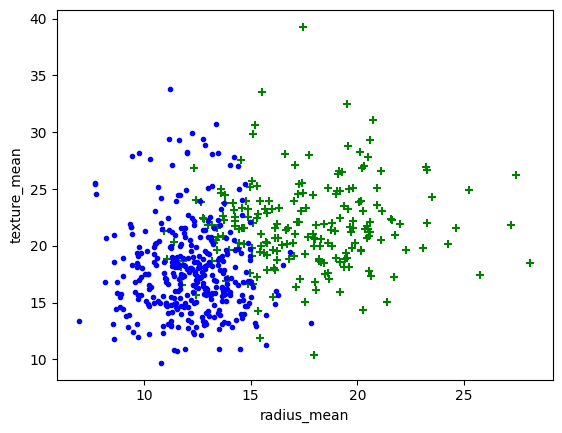

In [ ]:
# Filtering the dataframe to create two subsets:
# df1 contains rows where the 'Class' column value is 1 (Malignant tumors)
# df2 contains rows where the 'Class' column value is 2 (Benign tumors)
df1 = df[df.Class == 1]
df2 = df[df.Class == 2]

# Set the x-axis label as 'radius_mean' (mean radius of the tumor)
plt.xlabel('radius_mean')

# Set the y-axis label as 'texture_mean' (mean texture of the tumor)
plt.ylabel('texture_mean')

# Plot the first scatter plot for Malignant tumors (df1):
# - 'radius_mean' values on the x-axis
# - 'texture_mean' values on the y-axis
# - Points are colored green and marked with a plus sign ('+')
plt.scatter(df1['radius_mean'], df1['texture_mean'], color='green', marker='+')

# Plot the second scatter plot for Benign tumors (df2):
# - 'radius_mean' values on the x-axis
# - 'texture_mean' values on the y-axis
# - Points are colored blue and marked with a dot ('.')
plt.scatter(df2['radius_mean'], df2['texture_mean'], color='blue', marker='.')

# Display the scatter plot with both malignant and benign tumor data points
plt.show()


In [ ]:
# Dropping the 'Class' and 'attack_type' columns from the dataframe to create the feature set 'X'
# These columns are not needed for training the model since they represent the labels (target variable)
X = df.drop(['Class', 'attack_type'], axis='columns')

# Assigning the 'Class' column to the target variable 'y'
# This column will be used to train the model as it contains the labels (Malignant or Benign)
y = df.Class


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Importing train_test_split from scikit-learn to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Splitting the feature set 'X' and the target variable 'y' into training and testing sets
# - 70% of the data will be used for training the model (0.7 for training)
# - 30% of the data will be used for testing the model (0.3 for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Printing the number of samples in the training set
# This shows how many samples are used to train the model
print(len(X_train))

# Printing the number of samples in the testing set
# This shows how many samples are used to evaluate the model's performance
print(len(X_test))

# Model Training

As usual, we only really need three lines of Python to implement our model:

In [ ]:
model = SVC(kernel='linear')

In [ ]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[2 1 1 2 1 2 2 2 2 2 1 2 2 1 1 2 2 2 2 2 2 2 1 2 1 1 1 2 1 1 2 1 2 1 2 1 2
 1 2 1 2 2 2 1 2 2 1 2 1 2 2 2 2 2 1 2 2 2 1 2 1 1 2 2 2 2 1 1 1 2 2 2 2 1
 1 2 2 2 1 1 2 1 1 2 2 2 1 1 1 1 1 1 2 1 2 1 2 1 2 1 2 2 2 2 1 2 2 1 2 2 1
 2 1 2 2 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2 2 2
 2 1 2 1 2 2 1 1 2 2 2 1 2 1 2 2 2 1 1 2 2 2 1]


What happened here? First of all, let's remind ourselves of what is happening.

In [ ]:
# Creating the SVM model with a linear kernel
model = SVC(kernel='linear')

# Training the model using the training data
model.fit(X_train, y_train)

# Predictions using the trained model on the test data
y_pred = model.predict(X_test)



# Visualisation

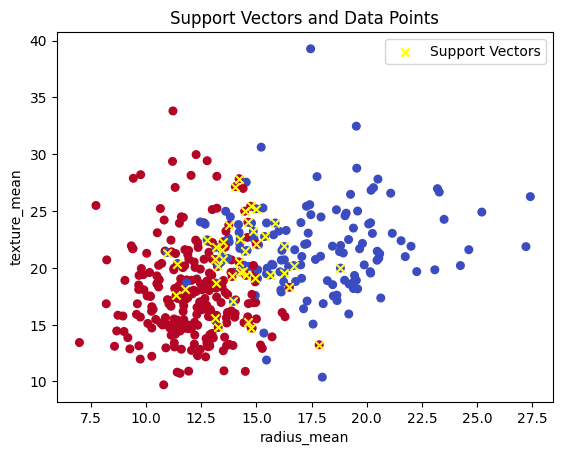

In [ ]:
# Getting the support vectors used by the SVM to define the decision boundary
support_vectors = model.support_vectors_

# Visualizing the support vectors
plt.scatter(X_train['radius_mean'], X_train['texture_mean'], c=y_train, cmap='coolwarm', s=30)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c='yellow', marker='x', label='Support Vectors')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.legend()
plt.title('Support Vectors and Data Points')
plt.show()


# Model evaluation: Understanding False Positives and False Negatives
When evaluating the performance of a machine learning model, particularly in classification tasks, the confusion matrix provides insight into the model's accuracy, but also into the types of errors it makes. Specifically, the confusion matrix reveals two key types of errors: false positives and false negatives, which have important practical implications.

**False Positives (Type I Error):**

A false positive occurs when the model incorrectly predicts the positive class (e.g., classifying a benign tumor as malignant). This is a case where the model predicts something is true when it is actually false.

*Implications*: In medical diagnostics, a false positive could lead to unnecessary tests, treatments, or procedures. For example, if a model wrongly identifies a benign tumor as malignant, it could lead to invasive treatments like surgery or chemotherapy, which carry risks and significant costs.
The impact of false positives is context-dependent. In some cases, the harm might be minimal, such as unnecessary follow-up appointments, but in high-stakes areas like healthcare or security, false positives can lead to severe consequences.

**False Negatives (Type II Error):**

A false negative happens when the model fails to identify the positive class, for instance, classifying a malignant tumor as benign. This error can be even more dangerous than a false positive.

*Implications*: In the medical field, a false negative is often more serious because it can cause a delay in diagnosis, leading to a missed opportunity for early treatment. For example, missing a malignant tumor can lead to the cancer advancing to a stage where it becomes much harder to treat or even incurable.


False negatives can have severe consequences in other fields too, such as fraud detection, where a false negative may mean missing a fraudulent transaction, potentially leading to significant financial losses.

**Importance of Balancing False Positives and False Negatives**

In many real-world applications, it's crucial to balance both types of errors. Depending on the context, we might prefer to minimize false positives (e.g., when unnecessary interventions are costly or risky) or false negatives (e.g., when missing an important event could be catastrophic). For example, in some situations like medical diagnoses, it may be more important to minimize false negatives (ensuring patients don't miss treatment) even if it means tolerating some false positives (unnecessary treatments).

In practice, understanding where the model is making these errors allows us to fine-tune it for specific needs, potentially adjusting the decision threshold to achieve the best balance for the given problem. This is why metrics like precision, recall, and F1-score, which directly account for false positives and false negatives, can be more informative than accuracy alone.

By analyzing the confusion matrix and considering the implications of false positives and false negatives, we can better understand a model's strengths and weaknesses, ensuring it aligns with real-world requirements and minimizes harmful outcomes.



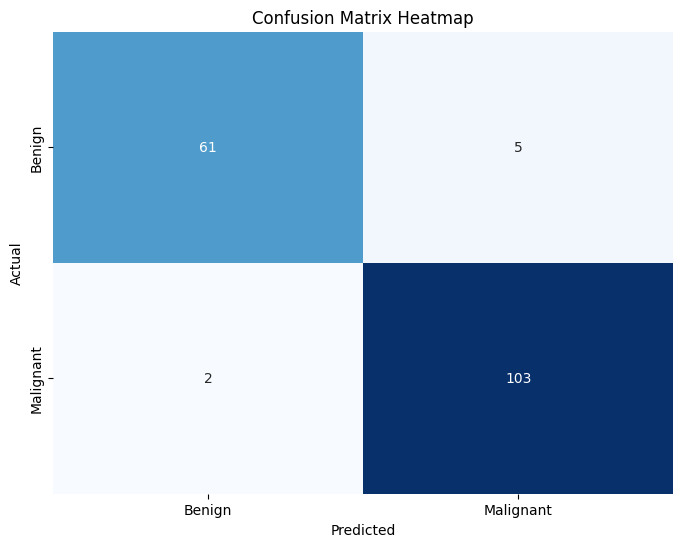

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Make predictions using the test set
y_pred = model.predict(X_test)

# Step 2: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


# Summary
In this notebook, we implemented a Support Vector Machine (SVM) model to classify data from the Breast Cancer dataset. We explored several critical steps involved in building, evaluating, and visualizing an SVM model, including:

- **Data Preprocessing**:

We loaded the dataset, mapped the diagnosis column to binary labels (Malignant and Benign), and dropped unnecessary columns for the analysis.
We split the data into features (`X`) and labels (`y`), and further divided them into training and test sets.

- **Model Training:**

We trained an SVM model using the linear kernel. The model was fitted on the training data to learn the decision boundary that separates the Malignant and Benign classes.

- **Visualisation:**

We created a 2D scatter plot to visualize how the model separates the two classes (Malignant and Benign) based on features like `radius_mean` and `texture_mean`.Finally, we visualized the confusion matrix using a heatmap, which helped us better interpret the classification errors.

- **Evaluation:**

We used the confusion matrix to evaluate the model's performance, understanding its accuracy and types of errors (false positives and false negatives).
The accuracy metric gave us an overview of the model's performance, but the confusion matrix, combined with a heatmap, provided a deeper understanding of how well the model predicted each class.


**Key Insights:**

The confusion matrix showed that the model's performance was balanced between false positives and false negatives. Understanding these errors is crucial for assessing model performance in sensitive applications, such as medical diagnostics.

# Exercise: Improving the Model

In this exercise, you can improve the model's performance by trying the following tasks:

1. **Hyperparameter Tuning**:

Try using different kernels (e.g., RBF or polynomial) for the SVM model and compare their performance.
Tune the regularization parameter (C) and kernel-specific parameters (like gamma for the RBF kernel) to see how they affect the accuracy and decision boundary.

2. **Feature Engineering**:

Investigate whether creating new features or selecting a subset of the most important features improves the model's performance. You could try Principal Component Analysis (PCA) for dimensionality reduction.
Experiment with different combinations of features to see if specific feature interactions lead to better classification results.

3. **Evaluating with Additional Metrics**:

Calculate the precision, recall, and F1-score to get a better sense of how well the model handles false positives and false negatives.
Consider using cross-validation to get a more reliable estimate of the model's performance.

4. **Class Imbalance**:

As there is class imbalance in the dataset, experiment with techniques like SMOTE (Synthetic Minority Over-sampling Technique) or class weighting in the SVM to improve the model’s handling of minority classes.